In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df=pd.read_csv("C:/Users/mayuri/Downloads/bank.csv")
df.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [42]:
df['deposit']=df['deposit'].replace(['yes','no'],[1,0])

In [43]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [44]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [45]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null int64
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


In [47]:
# features=df.drop([])
df.corr()

,age,balance,day,duration,campaign,pdays,previous,deposit
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805,0.081129
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.451919
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699,-0.128081
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272,0.151593
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000,0.139867
deposit,0.034901,0.081129,-0.056326,0.451919,-0.128081,0.151593,0.139867,1.000000


In [48]:
df.columns
df.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [49]:
#  df['marital']=df['marital'].replace(['married','single','divorced'],[0,1,2])
# df['housing']=df['housing'].replace(['yes','no'],[1,0])
#  df['loan']=df['loan'].replace(['yes','no'],[1,0])
# df['poutcome']=df['poutcome'].replace(['unknown', 'other', 'failure', 'success'],[2,3,0,1])

In [50]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df[['marital','housing','loan','poutcome','month','education','job']]:
    df[col]=labelencoder.fit_transform(df[col])

In [51]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,no,2343,1,0,unknown,5,8,1042,1,-1,0,3,1
1,56,0,1,1,no,45,0,0,unknown,5,8,1467,1,-1,0,3,1
2,41,9,1,1,no,1270,1,0,unknown,5,8,1389,1,-1,0,3,1
3,55,7,1,1,no,2476,1,0,unknown,5,8,579,1,-1,0,3,1
4,54,0,1,2,no,184,0,0,unknown,5,8,673,2,-1,0,3,1


In [61]:
df=df.drop(['contact'],axis=1)
df=df.drop(['default'],axis=1)

In [67]:
features=pd.DataFrame(df.iloc[:,:-1].values)
target_var=df['deposit']
features.head()
#target

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,59,0,1,1,2343,1,0,5,8,1042,1,-1,0,3
1,56,0,1,1,45,0,0,5,8,1467,1,-1,0,3
2,41,9,1,1,1270,1,0,5,8,1389,1,-1,0,3
3,55,7,1,1,2476,1,0,5,8,579,1,-1,0,3
4,54,0,1,2,184,0,0,5,8,673,2,-1,0,3


In [78]:
for col in df.columns:
    df.plot(x=df[col],y=df["deposit"],kind="scatter")

KeyError: '[59 56 41 ... 32 43 34] not in index'

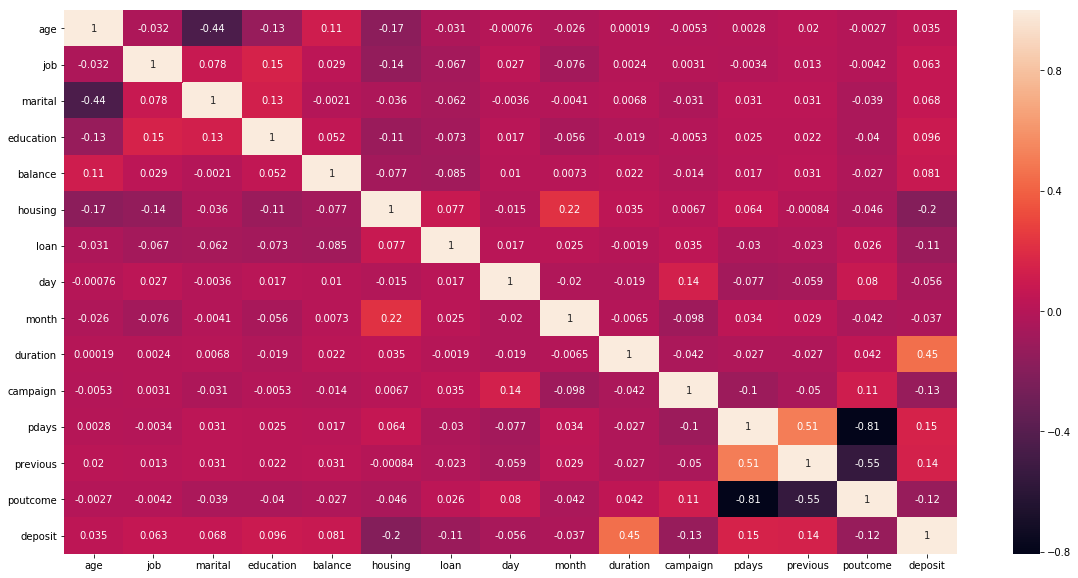

In [68]:
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)
plt.show()

In [69]:
df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,2343,1,0,5,8,1042,1,-1,0,3,1
1,56,0,1,1,45,0,0,5,8,1467,1,-1,0,3,1
2,41,9,1,1,1270,1,0,5,8,1389,1,-1,0,3,1
3,55,7,1,1,2476,1,0,5,8,579,1,-1,0,3,1
4,54,0,1,2,184,0,0,5,8,673,2,-1,0,3,1


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
X_train, X_test, Y_train, Y_test = train_test_split(features, target_var, test_size = 0.2, random_state=5)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[947 223]
 [254 809]]
